In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [2]:
data=pd.read_csv('Canada_mean_salary.csv') #загружаем датасет
df=data.dropna() # избавляемся от пропусков если есть
df.head(10) # выводим первые 10 строк

,Years of Experience,Salary
0,0.0,28067.083333
1,1.0,43580.424242
2,1.5,45000.000000
3,2.0,57366.018519
4,3.0,75977.700000
5,4.0,81958.295082
6,5.0,108229.526316
7,6.0,118321.255814
8,7.0,126469.592105
9,8.0,120862.179487


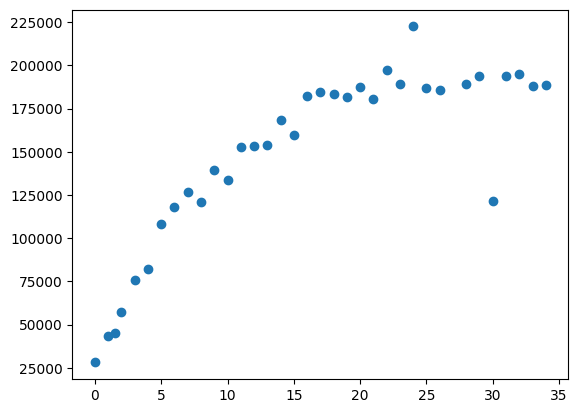

In [3]:
#рисуем график
data_x=df['Years of Experience']
data_y=df['Salary']
plt.scatter(data_x,data_y)
plt.show()

In [4]:
X_train,x_test,Y_train,y_test=train_test_split(data_x,data_y,train_size=0.8,random_state=43) #разбиваем выборку на тестовую и тренировочну(80 на 20)
X_train=np.array(X_train).reshape(-1,1) #преобразуем переменную в двумерный массив с одной строкой

model=LinearRegression()
model.fit(X_train,Y_train) #тренируем выборку
intercept=model.intercept_ # свободный член
coef=model.coef_ # коэффициент при x
r2=model.score(X_train,Y_train) # коэффициент детерминации R2
print('Cвободный член:', intercept, 
      '\nKоэффициент при x:', coef[0], 
      '\nКоэффициент R2:', r2)

Cвободный член: 77801.81795782852 
Kоэффициент при x: 4256.208067753016 
Коэффициент R2: 0.6720744670206782


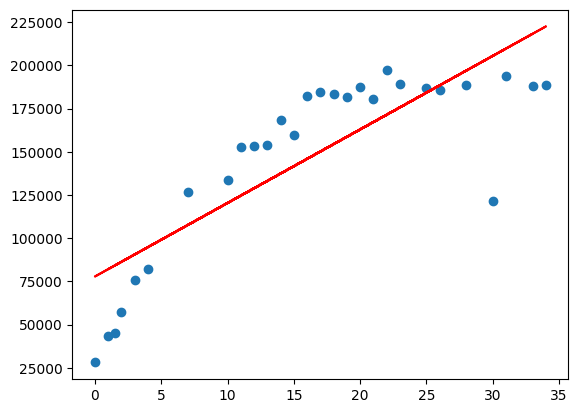

In [5]:
f = model.intercept_ + model.coef_ * X_train # функция полученной прямой
#рисуем график
plt.scatter(X_train, Y_train)
plt.plot(X_train, f, color = 'red')
plt.show()

In [6]:
x_test = np.array(x_test).reshape(-1, 1) #преобразуем тестовую часть переменной

y_pred = model.predict(x_test) #выполняем прогноз

mse = mean_squared_error(y_test, y_pred) #средняя квадратичная ошибка
r2 = r2_score(y_test, y_pred) # коэффициент детерминации R2

print('MSE на тестовой выборке:', mse,
     '\nR2 на тестовой выборке:', r2 )

MSE на тестовой выборке: 449165664.0687712 
R2 на тестовой выборке: 0.7505384085935081


как мы видим из графиков, показателю ошибки (MSE) и кожффициенту детерминции (R^2),линейныя регрессия не очень подходит к данному датасету. Хоть датасет и ие